# Teaching Data Science

Miles Berry

University of Roehampton

8 April 2021

CTM at ATM2021

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://bit.ly/atmconf2021)


This notebook: [bit.ly/atmconf2021](http://bit.ly/atmconf2021)

Press space to move on, click in a box to edit, shift-enter to run.

# Find motivating contexts for teaching computer science

* Animation
* Games
* Robotics
* Art
* Music

* Statistics

# Emphasise the relevance of statistics

* Work with big(ish) data
* Explore real world problems
* Use their coding skills

> Foundational training in data skills begins
at school, and there is an opportunity
and a need to consult broadly on a future
curriculum that addresses the breadth of data
skills across mathematics and science, the
arts and humanities. Students need to be well
informed about the ever-widening range of
opportunities working with data. 

[Royal Society, 2019](https://royalsociety.org/-/media/policy/projects/dynamics-of-data-science/dynamics-of-data-science-skills-report.pdf)

## Curriculum design - computing

* Foundations - computer science
* Applications - information technology
* Implications - digital literacy

## Curriculum design - data science

* Foundations - probability and statistics
* Applications - using software and writing code
* Implications - question everything; trust no one

## Data science in the computing curriculum

**Key Stage 1**: use technology purposefully to create, organise, store, manipulate and retrieve digital content; recognise common uses of information technology beyond school

**Key Stage 2**: select, use and combine a variety of software (including internet services) on a range of digital devices to design and create a range of programs, systems and content that accomplish given goals, including collecting, analysing, evaluating and presenting data

**Key Stage 3**: undertake creative projects that involve selecting, using, and combining multiple applications, preferably across a range of devices, to achieve challenging goals, including collecting and analysing data

**Key Stage 4**: develop and apply their analytic, problem-solving, design, and computational thinking skills


## Data science in the mathematics curriculum

**Year 2** interpret and construct simple pictograms, tally charts, block diagrams and tables; ask and answer simple questions by counting the number of objects in each category and sorting the categories by quantity; ask-and-answer questions about totalling and comparing categorical data

## Data science in the mathematics curriculum

**Year 3** interpret and present data using bar charts, pictograms and tables; solve one-step and two-step questions using information presented in scaled bar charts and pictograms and tables

**Year 4** interpret and present discrete and continuous data using appropriate graphical methods, including bar charts and time graphs; solve comparison, sum and difference problems using information presented in bar charts, pictograms, tables and other graphs

**Year 5** solve comparison, sum and difference problems using information presented in a line graph; complete, read and interpret information in tables, including timetables

**Year 6** interpret and construct pie charts and line graphs and use these to solve problems; calculate and interpret the mean as an average

## Data science in the mathematics curriculum

**Key Stage 3** 

* distributions of single variables
  * averages and spread
* visualisation
* relationships between two variables

## Data science in the mathematics curriculum

**Key Stage 4** 

* sampling
* time series
* visualisation
* empirical distribututions: visualisation, averages and spread
* describing a population
* correlation, regression, predictions, limitations

## Other curricula are available...

* The [large dataset question](https://mei.org.uk/large-data-sets) in A Level maths
* MEI's [data science unit](https://mei.org.uk/data-science) for A Level maths
* SQA [National Progression Award in Data Science](https://www.sqa.org.uk/sqa/91458.html)
* Data science in [CSTA's Standards](https://drive.google.com/open?id=1-dPTAI1yk2HYPKUWZ6DqaM6aVUDa9iby)
* Bootstrap World [Data Science](https://www.bootstrapworld.org/blog/curriculum/Data-Science-Is-Coming.shtml)
* IDSSP's [Curriculum frameworks for introductory data science](http://www.idssp.org/files/IDSSP_Frameworks_1.0.pdf) 
* Grillenberger and Romeike's (2018) [Data literacy competency model](https://computingeducation.de/pub/2018_Grillenberger-Romeike_WiPSCE2018.pdf). 

# Which tools?

* Excel or Google Sheets, Tableau, Orange, **Python** (with [Pandas](https://pandas.pydata.org/) and [Seaborn](https://seaborn.pydata.org/)), R, Julia
* IDLE, Visual Studio Code, **[Jupyter](https://jupyter.org/)**
* **[Google Colab](https://colab.research.google.com/)**, [Kaggle](https://www.kaggle.com/kernels), [Binder](https://mybinder.readthedocs.io/en/latest/introduction.html) with [Rise](https://rise.readthedocs.io/en/stable/)

*Other tools are available!*

# Foundations

## Introducing probability and statistics: 
## dice rolling

We'll start by loading a few standard libraries

In [1]:
from random import randint # pseudorandom whole numbers
from math import sqrt      # squareroots

import matplotlib.pyplot as plt # basic graphics library
%matplotlib inline         
                           # have Jupyter display static graphics inline
plt.style.use('ggplot')    # ggplot style graphics
plt.rcParams['figure.figsize'] = [10, 6] # make the graphs a bit bigger

import warnings            # how should we deal with Python warnings?
warnings.filterwarnings('ignore') # just ignore them. This is a good rule for life. 

Let's start by creating a function to roll a dice, and then rolling lots of dice lots of times.

In [2]:
def roll(dice=1,sides=6):
  score = 0
  for i in range(dice):
    score += randint(1,sides)
  return score

def rolls(dice=1,sides=6,times=1):
  scores = []
  for i in range(times):
    scores.append(roll(dice,sides))
  return scores

example = rolls(2,6,100) # roll two, 6-sided dice, 100 times.

example[:20]


[4, 6, 7, 12, 11, 9, 5, 4, 10, 5, 4, 7, 6, 6, 6, 5, 4, 7, 9, 4]

Can we work out the relative frequency (observed probability) of particular scores? 

In [3]:
def relativeFrequency(x, data):
    count = 0
    total = 0
    for i in data:
        if i == x:
            count += 1
        total += 1
    return(count/total)

relativeFrequency(7, example)

0.19

Can we get the relative frequencies for all the possible scores?

In [4]:
relativeFrequencies = []
for i in range(1, 13):
    relativeFrequencies.append(relativeFrequency(i, example))

relativeFrequencies

[0.0, 0.04, 0.01, 0.11, 0.12, 0.19, 0.19, 0.12, 0.12, 0.06, 0.03, 0.01]

## Computing statistics

* Mean
* Mode
* Median
* Range
* Standard deviation

Finding the mean

In [5]:
def mymean(data):
    total = 0
    count = 0
    for i in data:
        total += i
        count += 1
    return total/count

mymean(example)

6.71

Other approaches to calculating the mean:

Using sum:
```python
def mymean(data):
    return sum(data)/len(data)
```
Using higher order functions:
```python
from functools import reduce

def mymean(data):
    return((reduce(lambda total, item: total + item, data, 0)) / 
           (reduce(lambda count, item: count + 1, data, 0)))

```
Using the mean function!
```python
from statistics import mean
```


To work out the mode of our data, we need to know which item came up with the greatest frequency, so we may as well work out a frequency table...

In [6]:
def freqtable(data):
    freqtable = {}
    for i in data:
        if i in freqtable.keys():
            freqtable[i] += 1
        else:
            freqtable[i] = 1
    return(freqtable)

freqtable(example)

sorted(freqtable(example).items()) 

[(2, 4),
 (3, 1),
 (4, 11),
 (5, 12),
 (6, 19),
 (7, 19),
 (8, 12),
 (9, 12),
 (10, 6),
 (11, 3),
 (12, 1)]

If we've got a frequency table, we may as well plot a bar chart...

<BarContainer object of 11 artists>

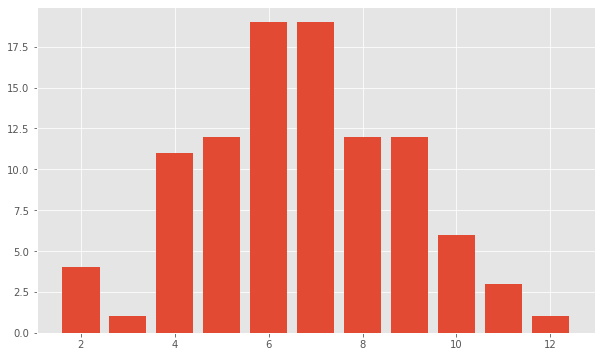

In [7]:
plt.bar(freqtable(example).keys(),freqtable(example).values())

This is exactly the same shape as our relative frequencies earlier. Why is that?

In [8]:
def mymode(data):
    mode = 0
    max = 0
    freqs = freqtable(data)
    for i in freqs.keys():
        if freqs[i]>max:
            max=freqs[i]
            mode = i
    return mode

mymode(example)

6

Finding the median

In [9]:
def quicksort(data):
    if len(data)==0:
        return data
    else:
        lower = [x for x in data[1:] if x < data[0]]
        upper = [x for x in data[1:] if x >= data[0]]
        return quicksort(lower) + [data[0]] + quicksort(upper)

def mymedian(data):
    l = len(data)
    if l % 2 == 1:
        return quicksort(data)[l // 2]
    else:
        return quicksort(data)[(l+1)//2]
    
mymedian(example)

7

Is it *absolutely* necessary to sort the data to find the median? The above algorithm is O(n log n). I can think of an O(n + k log k) algorithm, where k is the number of distinct values...

Finding the range

In [10]:
def myrange(data):
    minimum = float('inf')
    maximum = float('-inf')
    for i in data:
        if i < minimum:
            minimum = i
        if i > maximum:
            maximum = i
    return (maximum - minimum)


myrange(example)

10

Finding the standard deviation. Which algorthm do you like best?

In [11]:
def mysd1(data):
    '''sqrt of mean squared deviations'''
    m = mymean(data)
    squaredDeviations = map(lambda x: (x-m)**2, data)
    return sqrt(mymean(squaredDeviations))

def mysd2(data):
    '''sqrt of (mean of squares - square of means)'''
    return sqrt((mymean(map(lambda x: x**2, data)) - mymean(data)**2))

print('method 1',mysd1(example))
print('method 2',mysd2(example))

method 1 2.1461360627881914
method 2 2.1461360627881927


# Applications

## Data analysis in Python: 
## Working with historical weather data

<img src="./tree.jpg">

Temperatures in Godalming, 2020

![New Zealand Census Bureau](https://i0.wp.com/new.censusatschool.org.nz/wp-content/uploads/2012/11/data-detective.png?resize=800%2C600&ssl=1)

[New Zealand Census at School](https://new.censusatschool.org.nz/)

## Start with interesting questions

* Is winter wetter than summer?
* Is spring hotter than autumn?
* Has the climate changed?

For this, we'll import some of Python's libraries rather than creating all this ourselves!

In [12]:
import pandas as pd # data handling toolbox
import requests     # tool to download data off the web
import datetime     # dates and times are horrible. This makes things a little easier.
import seaborn as sns # nice graphics toolbox, built on, and transforming matplotlib
sns.set()           # ggplot style graphs
import scipy.stats as stats # statistical testing


We'll also download the historical (month by month) weather data for the Heathrow weather station from the [UK Met Office](https://www.metoffice.gov.uk/research/climate/maps-and-data/historic-station-data) website. 

If you're going to try this in school, use something more local?

In [13]:
url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/heathrowdata.txt'
raw = requests.get(url, allow_redirects=True)
open('data.txt','wb').write(raw.content) 

46430

What follows is unpleasant.

Transforming the data into a usable format is non-trivial, requires attention to detail and is specific to the particular use case.

In general, do this for pupils, or have them do this in Excel where they can see what they're doing.

In [14]:
dataset = pd.read_csv("data.txt", skiprows=[0,1,2,3,4,5],
                      names=['yyyy', 'mm', 'tmax', 'tmin', 'af', 'rain', 'sun', 'notes'],
                      delim_whitespace=True, warn_bad_lines=True, error_bad_lines=False, na_values='---')
dataset['sun'] = dataset['sun'].str.replace(r'#', '')
dataset = dataset.drop([0])
dataset['date'] = dataset.apply(lambda x: datetime.date(int(x['yyyy']), int(x['mm']), 1), axis=1)
dataset.index = dataset['date']
dataset.index = pd.to_datetime(dataset.index)
dataset.index = dataset.index.to_period('M')
dataset = dataset.drop(['date'], axis=1)
dataset = dataset.drop(['notes'], axis=1)
dataset['mm'] = dataset['mm'].astype('int')
dataset['tmax'] = dataset['tmax'].astype('float')
dataset['tmin'] = dataset['tmin'].astype('float')
dataset['temp'] = (dataset['tmax']+dataset['tmin'])/2
dataset['af'] = dataset['af'].astype('float', errors='ignore')
dataset['rain'] = dataset['rain'].astype('float')
dataset['sun'] = dataset['sun'].astype('float', errors='ignore')
dataset = dataset[['yyyy','mm','tmin','tmax','temp','af','rain','sun']]
dataset[-3:].round(1)

,yyyy,mm,tmin,tmax,temp,af,rain,sun
date,,,,,,,,
2021-01,2021,1,1.3,7.0,4.2,12.0,91.6,29.4
2021-02,2021,2,3.1,9.1,6.1,7.0,32.4,57.9
2021-03,2021,3,4.1,12.1,8.1,1.0,24.6,91.4


Adding columns to identify seasons and decades

In [15]:
seasons = {12:'winter',1:'winter',2:'winter',
           3:'spring',4:'spring',5:'spring',
           6:'summer',7:'summer',8:'summer',
           9:'autumn',10:'autumn',11:'autumn'}

dataset['season'] = ((dataset.index.month).map(seasons))
dataset['decade'] = ((dataset.index.year).map(lambda y : str(y//10)+'0s'))

dataset[-5:]

,yyyy,mm,tmin,tmax,temp,af,rain,sun,season,decade
date,,,,,,,,,,
2020-11,2020,11,6.2,12.7,9.45,2.0,50.2,44.6,autumn,2020s
2020-12,2020,12,3.5,8.5,6.00,7.0,72.4,36.5,winter,2020s
2021-01,2021,1,1.3,7.0,4.15,12.0,91.6,29.4,winter,2020s
2021-02,2021,2,3.1,9.1,6.10,7.0,32.4,57.9,winter,2020s
2021-03,2021,3,4.1,12.1,8.10,1.0,24.6,91.4,spring,2020s


So what have we got here?

In [16]:
dataset.describe().round(1)

,mm,tmin,tmax,temp,af,rain,sun
count,879.0,879.0,879.0,879.0,867.0,879.0,771.0
mean,6.5,7.1,14.9,11.0,3.0,50.5,129.0
std,3.5,4.5,5.8,5.1,4.7,29.8,65.0
min,1.0,-4.6,0.8,-1.9,0.0,0.3,18.5
25%,3.0,3.4,9.8,6.6,0.0,27.9,68.4
50%,6.0,6.5,14.7,10.7,0.0,46.7,125.6
75%,9.0,11.2,20.1,15.6,5.0,68.8,176.4
max,12.0,16.7,28.3,22.4,28.0,174.8,310.1


## We might start by just exploring the data we have.

We hardly had any rain last May here. How unusual was that?

In [17]:
dataset[dataset.rain<=3].sort_values(by='rain')

,yyyy,mm,tmin,tmax,temp,af,rain,sun,season,decade
date,,,,,,,,,,
1995-08,1995,8,15.6,27.0,21.30,0.0,0.3,295.3,summer,1990s
2018-06,2018,6,13.1,24.2,18.65,0.0,0.4,234.5,summer,2010s
1978-10,1978,10,8.4,17.1,12.75,0.0,1.6,98.4,autumn,1970s
2020-05,2020,5,9.1,21.1,15.10,0.0,2.0,308.6,spring,2020s
1956-02,1956,2,-3.6,2.9,-0.35,22.0,2.3,NaN,winter,1950s
1959-02,1959,2,1.2,7.4,4.30,7.0,2.4,54.8,winter,1950s
1993-02,1993,2,2.5,7.2,4.85,2.0,2.4,51.0,winter,1990s
2011-04,2011,4,8.6,19.7,14.15,0.0,2.4,218.0,spring,2010s


We can easily summarise the data. 

What's the average maximum temperature for each month of the year?

In [18]:
dataset.groupby(dataset.index.month).temp.mean().round(1) 

date
1      4.7
2      5.0
3      7.2
4      9.6
5     13.0
6     16.2
7     18.2
8     17.9
9     15.4
10    11.8
11     7.7
12     5.5
Name: temp, dtype: float64

OK, but what does that look like on a graph?

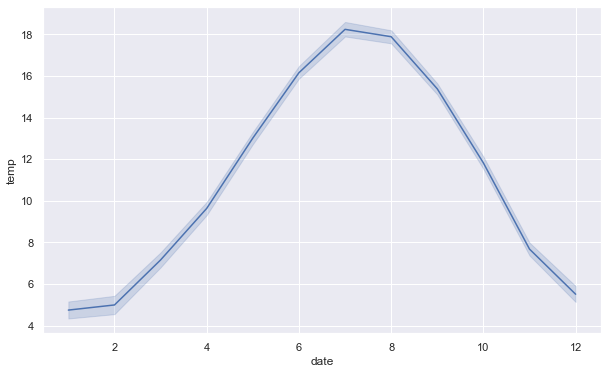

In [19]:
sns.lineplot(dataset.index.month,dataset.temp)

## Can we have a look at those season questions now?

* Is winter wetter than summer?
* Is spring hotter than autumn?

In [20]:
dataset.groupby(dataset.season,sort=False).mean().drop(columns=['mm']).round(2)

,tmin,tmax,temp,af,rain,sun
season,,,,,,
winter,2.13,8.04,5.08,8.32,50.37,58.15
spring,5.64,14.22,9.93,2.04,43.51,155.27
summer,12.71,22.16,17.43,0.00,50.26,195.63
autumn,7.93,15.33,11.63,1.42,58.04,107.57


Comparing rainfall by season:

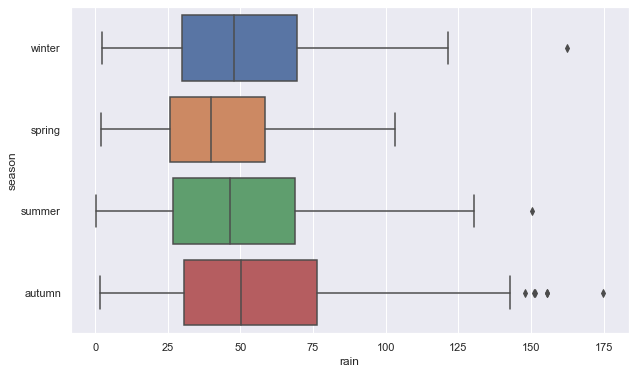

In [21]:
sns.boxplot('rain','season',data=dataset)

OK, so there's a tiny difference between winter and summer, but is that significant?

In [22]:
stats.ttest_ind(dataset[dataset['season']=='winter'].rain,
                      dataset[dataset['season']=='summer'].rain)

Ttest_indResult(statistic=0.041429265382103224, pvalue=0.9669725606281587)

What about the temperatures?

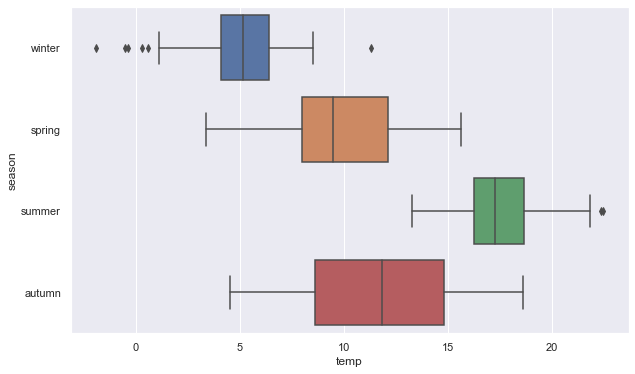

In [23]:
sns.boxplot('temp','season',data=dataset)

There's a difference between spring and autumn, but is *this* significant?

In [24]:
stats.ttest_ind(dataset[dataset['season']=='spring'].temp,
                      dataset[dataset['season']=='autumn'].temp)

Ttest_indResult(statistic=-5.712875082526107, pvalue=2.0570910075413518e-08)

## Are these measurements related? 

Is there a link between temperature and rainfall?

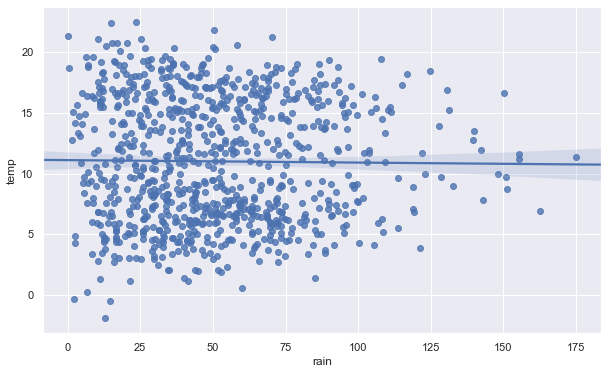

In [25]:
sns.regplot('rain','temp',data=dataset)

In [26]:
stats.linregress(dataset.rain,dataset.temp)


LinregressResult(slope=-0.0020187871792556053, intercept=11.105667570121025, rvalue=-0.011815283713906192, pvalue=0.726479426363801, stderr=0.0057692089777054935)

What about between sunshine and temperature?

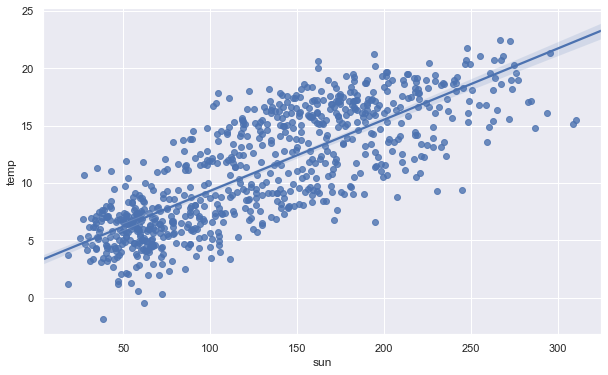

In [27]:
sns.regplot('sun','temp',data=dataset)

In [29]:
stats.linregress(dataset.dropna().sun,dataset.dropna().temp)


LinregressResult(slope=0.06209572995900665, intercept=3.093146824272795, rvalue=0.7928241077572976, pvalue=1.5031253464051406e-167, stderr=0.0017213142735721734)

## Does this data have anything to say about climate change?

How has the temperature varied over the years the data has been collected?

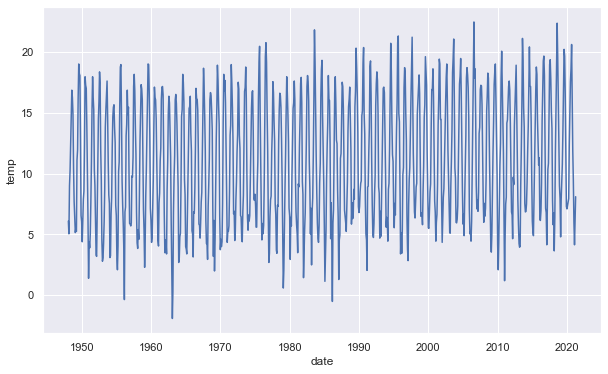

In [30]:
sns.lineplot(dataset.index.end_time,dataset.temp)

So there's a periodic pattern - summers *are* warmer than winters, but is there any overall trend?

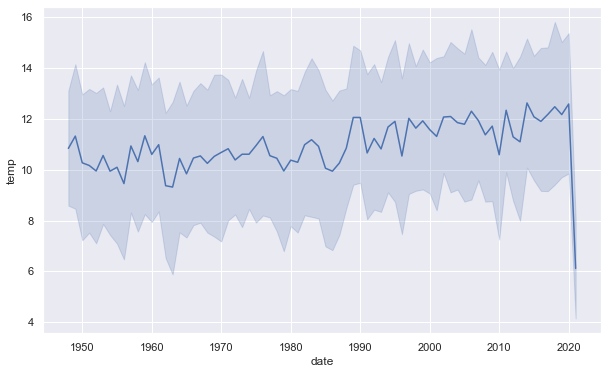

In [31]:
sns.lineplot(dataset.index.year,dataset.temp)

Well, it seems to be sloping up a bit, but it's a bit hard to see.

Are there any other ways to visualise this?

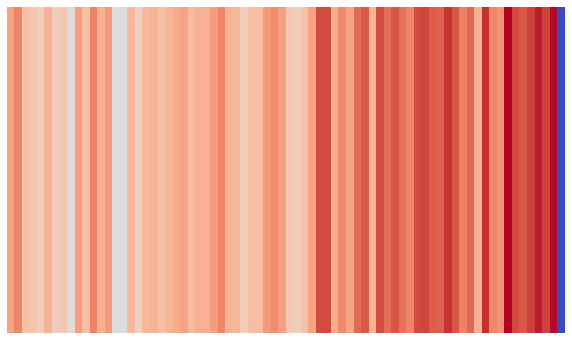

In [32]:
annual=dataset.resample('A').mean()
sns.heatmap([annual['temp']],
            cbar=False,xticklabels=False,yticklabels=False,cmap='coolwarm')

Hey, that looks great. Could we get that on flipflops maybe? 
More details [here](https://en.wikipedia.org/wiki/Warming_stripes). 

![Warming Stripes](https://cdn.vox-cdn.com/uploads/chorus_asset/file/15274135/Screen_Shot_2019_03_04_at_12.05.58_PM.png)

OK, so that's year by year. What about over the decades?

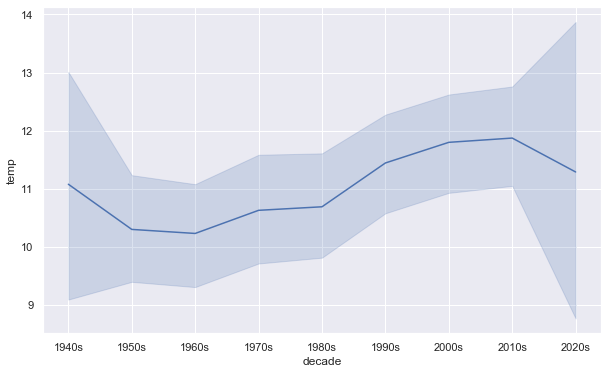

In [33]:
sns.lineplot(dataset.decade,dataset.temp)

But you've only got a year and a bit of data from the 1940s, and just 15 months from the 2020s. 

Can't we get rid of those years?

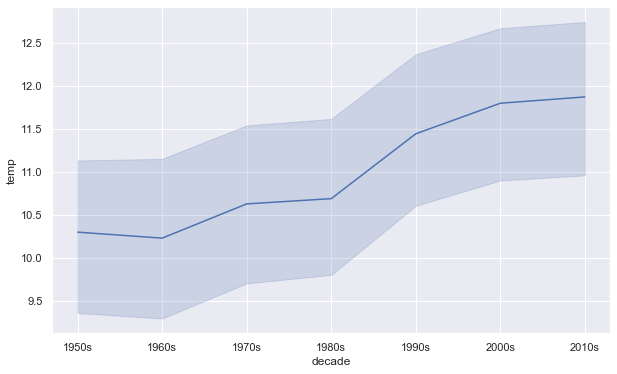

In [34]:
dataset2=dataset[(dataset.index.year>1949) & (dataset.index.year<2020)]
sns.lineplot(dataset2.decade,dataset2.temp)

What about a five year, rolling average?

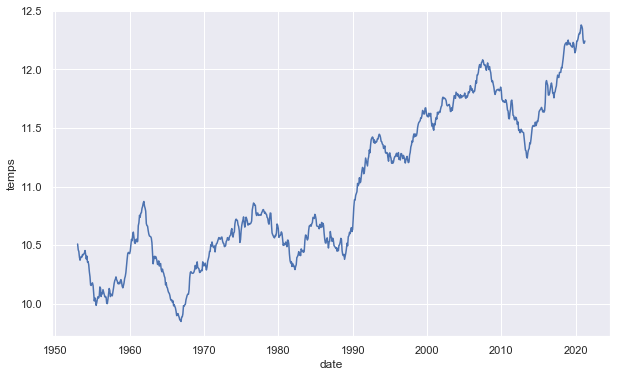

In [35]:
dataset['temps']=dataset.temp.rolling(window=60).mean()
sns.lineplot(dataset.index.end_time,dataset.temps)

# Implications

## Ethics in the time of coronavirus

Cynicism and skepticism

# Trust no one

# DO NOT TRY THIS AT HOME!

The following three slides are intended to illustrate some mistakes and dangers in conducting online surveys, particularly with young people. 

## Take my survey!

![Covid survey part 1](covidsurvey1.png)

## Take my survey!

![Covid survey part 2](covidsurvey2.png)

## Take my survey!

![Covid survey part 3](covidsurvey3.png)

## London, 1854

![John Snow's map of cholera cases](snow.jpg)

## Individual consent vs the public good?

>Because they work with whole populations, epidemiologists can see what is dangerous and what isn’t, whether particular illnesses are becoming more or less common, what treatment works and what doesn’t, and – in the case of surgeons – who is dangerous and who isn’t. **Epidemiology has helped save more lives than any of the other more glamorous branches of medicine.**

[Traynor, 2001](https://www.theguardian.com/society/2001/apr/12/3)

## Mobility trends

![Mobility trends](mobility.png)

[Apple](https://covid19.apple.com/mobility)

## Phone locations

![Google Mobility report](googlemobility.png)

[Google](https://www.google.com/covid19/mobility/)

## TraceTogether

![TraceTogether](tracetogether.jpg)

> “Data will only be used for Covid-19 contact tracing.”

...

> "Also, we want to be transparent with you. TraceTogether data may be used in circumstances where citizen safety and security is or has been affected ... The Singapore Police Force is empowered under the CPC to obtain any data, including TraceTogether data, for criminal investigations.”

## Asymptomatic testing

> You will need to satisfy yourself that you have a lawful basis for processing the personal data. You might want to consider whether the duties prescribed in education legislation on schools ... to make arrangements to safeguard and promote the welfare of pupils provide sufficient legal basis without having to rely on consent.

[DfE, 2020](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/950515/Schools_Colleges_Testing_Handbook_revised_04012021.pdf)

## Question everything

## 100,000 tests a day, by the end of April!

![tests on 30 April](covidtests.jpeg)

## ... and then what?

![daily tests, 30 April](dailytests.png)

[UK Government, May 9 2020](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/884010/2020-05-09_COVID-19_Press_Conference_Slides__7_.pdf)

## But actually...

![Testing figures](testing.png)

## On easing lockdown 1.0

![R and lockdown](rgraph.png)

[Boris Johnson, May 10 2020](https://www.youtube.com/watch?&v=bjvRhrJqNHI)

## COVID Alert

![Alert status](alerts.png)

[Boris Johnson, May 10 2020](https://www.youtube.com/watch?&v=bjvRhrJqNHI)

## Calculating the alert level

![Equation](equation.png)

[Boris Johnson, May 10 2020](https://www.youtube.com/watch?&v=bjvRhrJqNHI)

On current figures, the alert level is 4,364,529.7 to 4,364,529.9

# Questions?

These slides: [bit.ly/atmconf2021](http://bit.ly/atmconf2021)

m.berry@roehampton.ac.uk

[milesberry.net](http://milesberry.net)

[@mberry](http://twitter.com/mberry)
